## To analyze NBA shot data and build a machine learning model that predicts whether a shot will be made or missed based on contextual and spatial features.

Basic Checks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\balag\OneDrive\Desktop\Data Mites\Projects\Data\data.csv")
data

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


In [3]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
data.tail()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696
30696,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30697


In [5]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [6]:
data.shape

(30697, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [8]:
data.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [9]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [10]:
data['shot_made_flag'].value_counts()

shot_made_flag
0.0    14232
1.0    11465
Name: count, dtype: int64

EDA

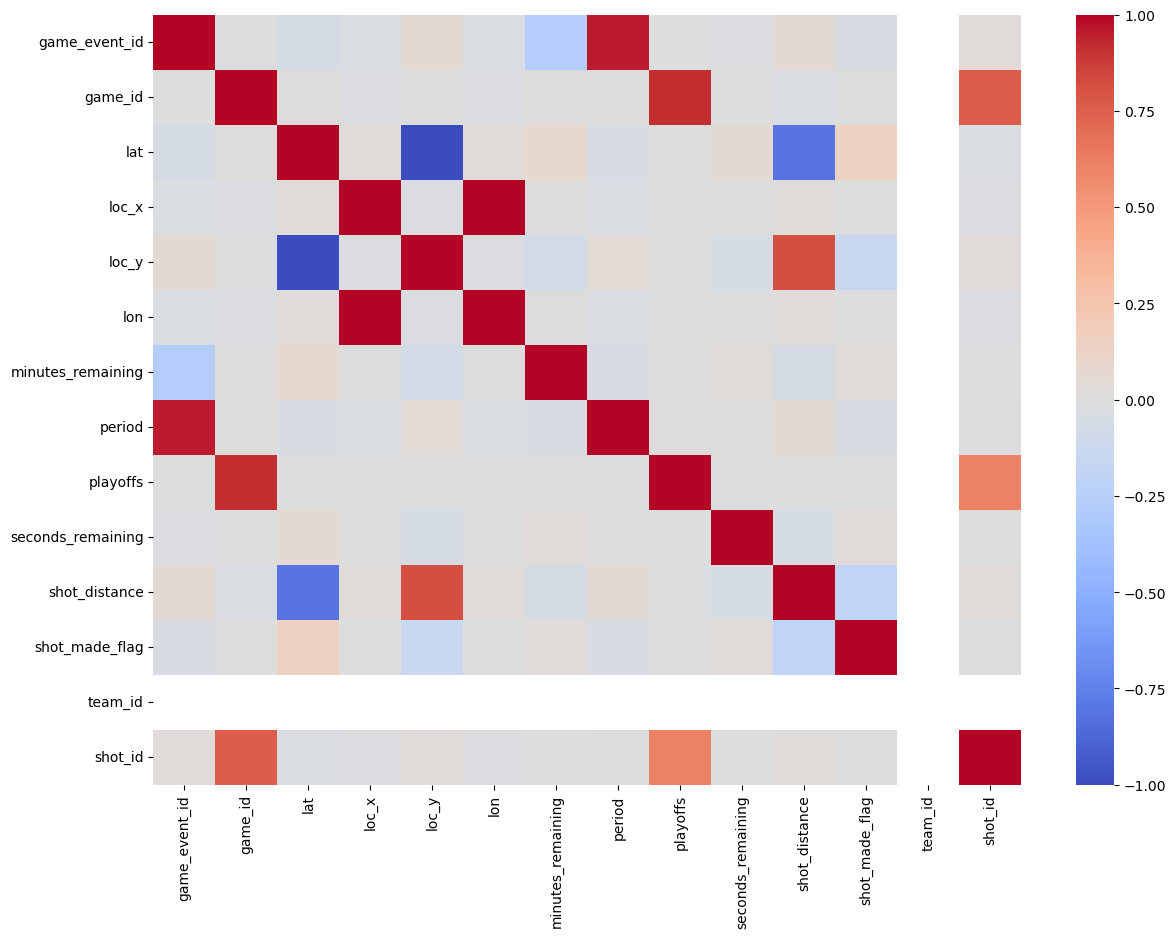

In [11]:
num_data = data.select_dtypes(include=['int64', 'float64'])
corr = num_data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,cmap='coolwarm',annot=False,)
plt.show()

Univariate Analysis 

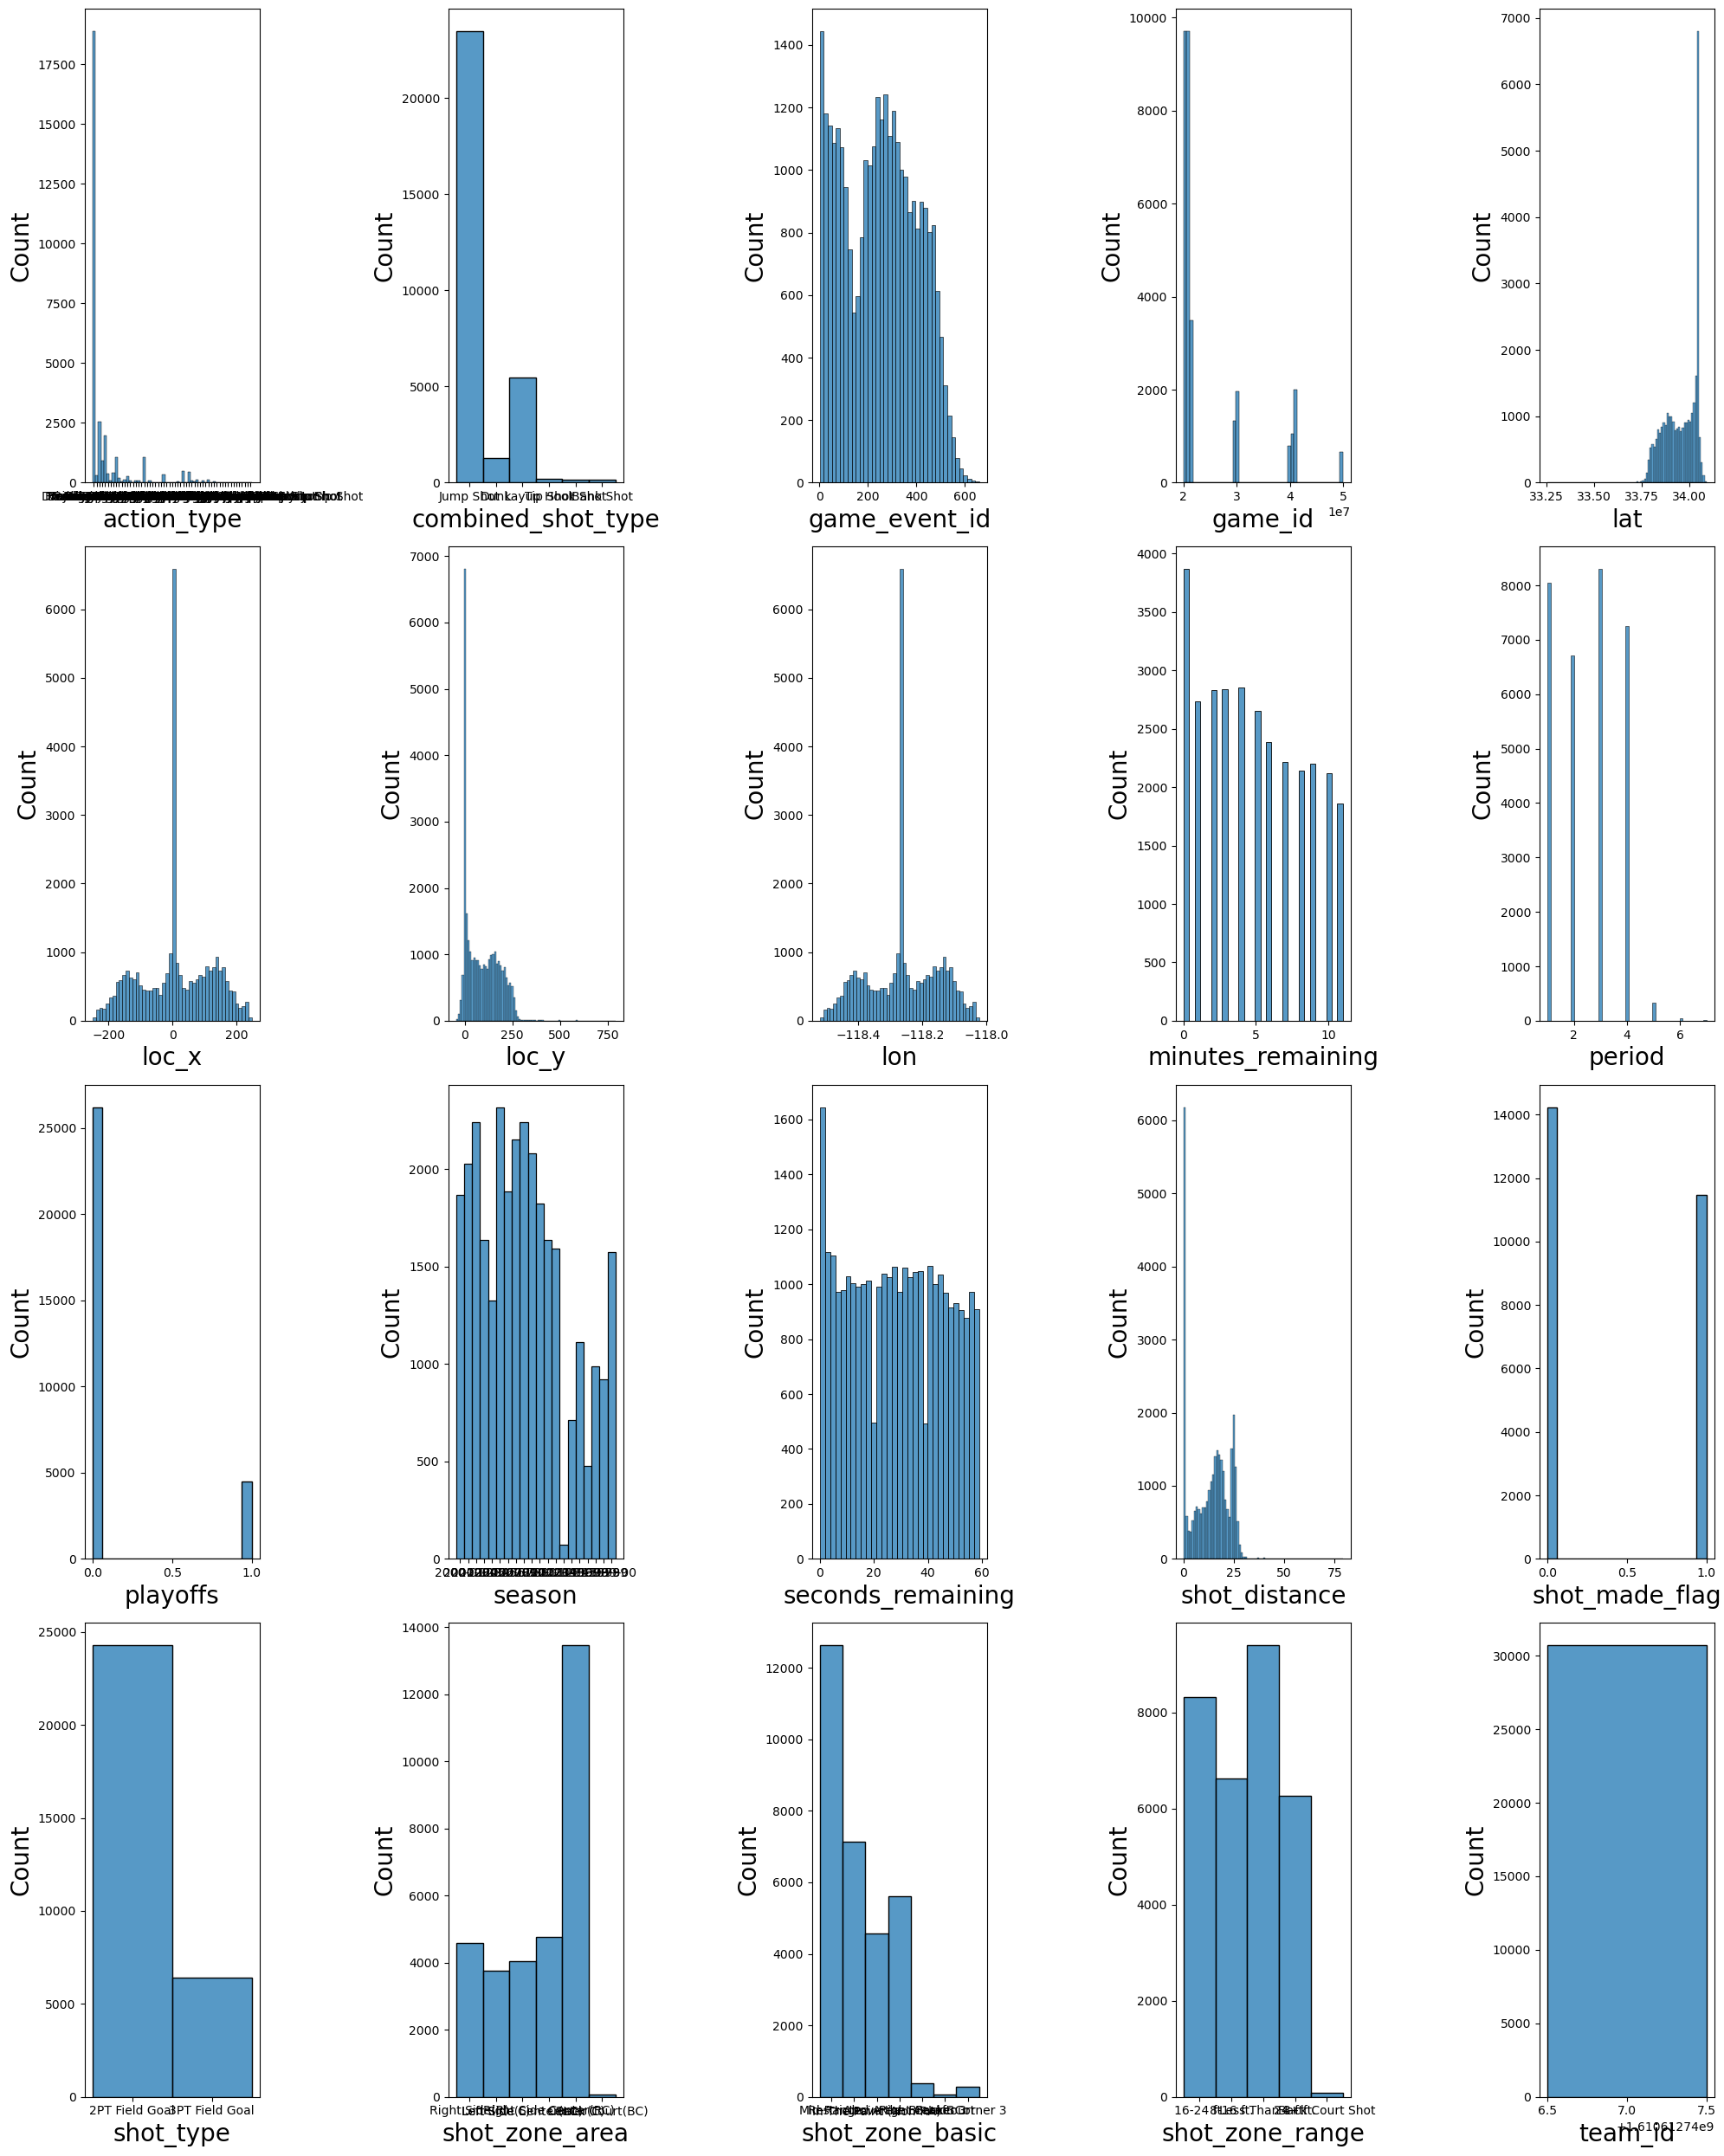

In [12]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Target Variable :

In [13]:
data['shot_made_flag'].value_counts()

shot_made_flag
0.0    14232
1.0    11465
Name: count, dtype: int64

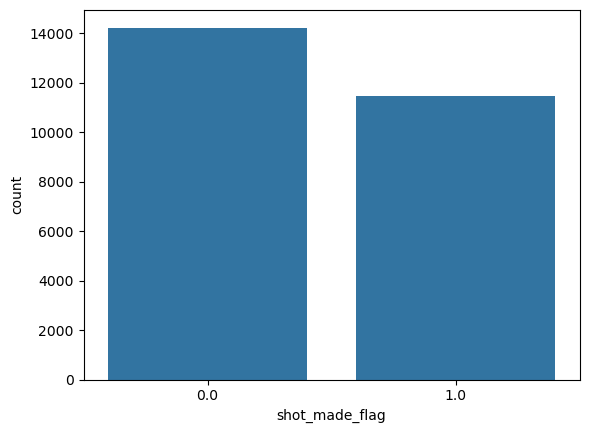

In [14]:
sns.countplot(x='shot_made_flag', data=data)
plt.show()

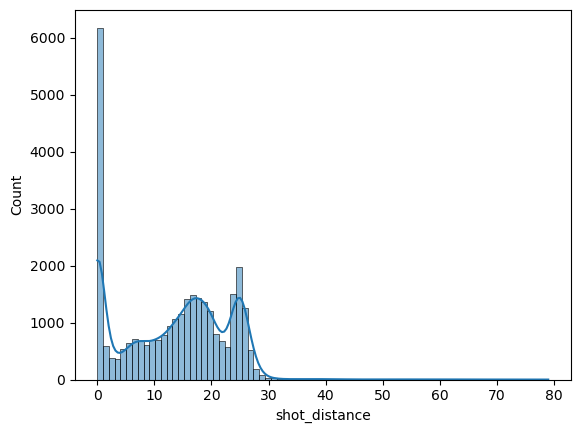

In [15]:
sns.histplot(data['shot_distance'], kde=True)
plt.show()

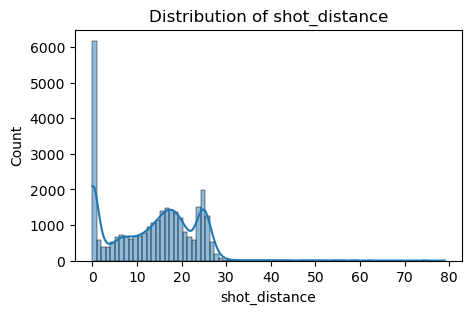

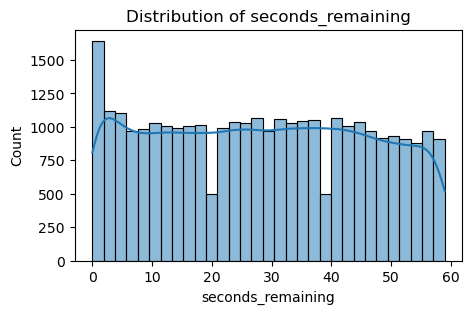

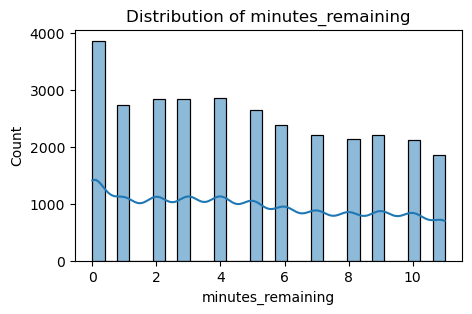

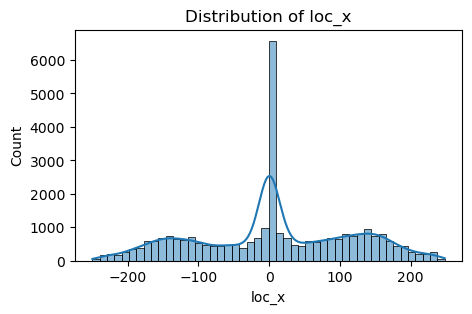

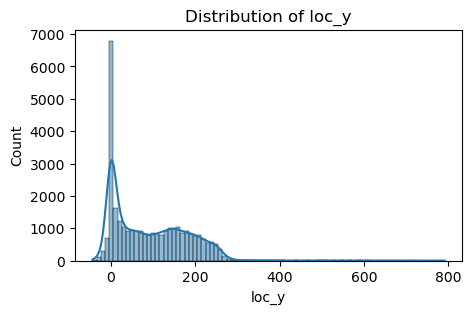

In [16]:
num_cols = ['shot_distance','seconds_remaining','minutes_remaining','loc_x','loc_y']

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


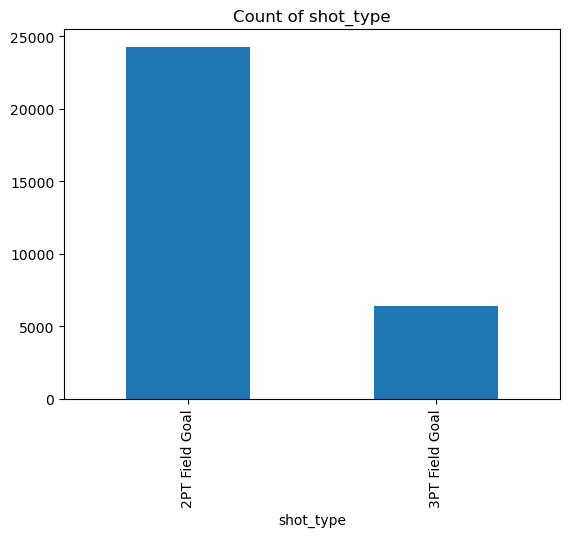

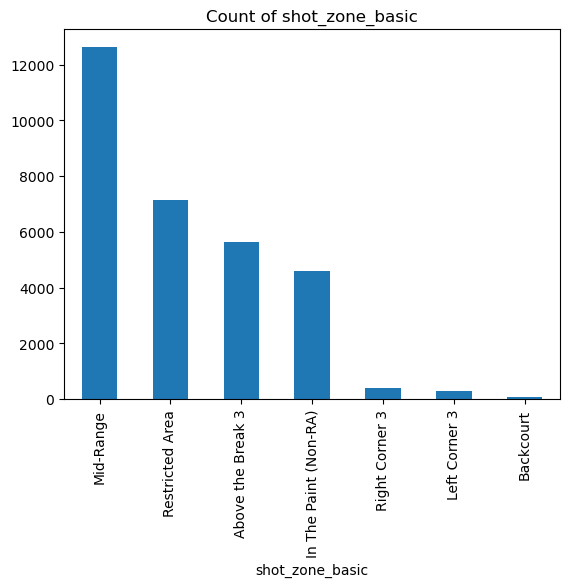

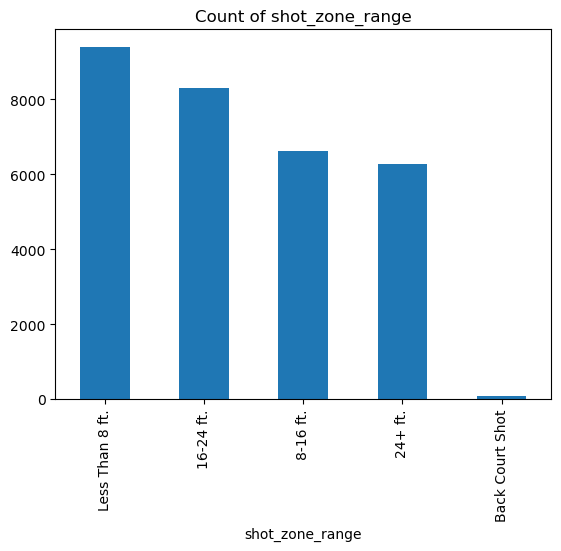

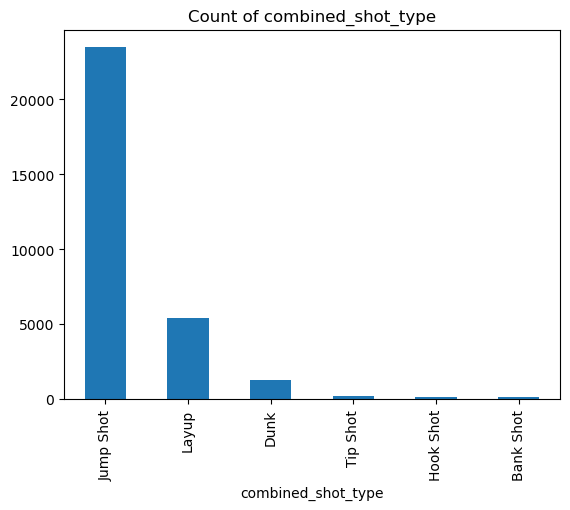

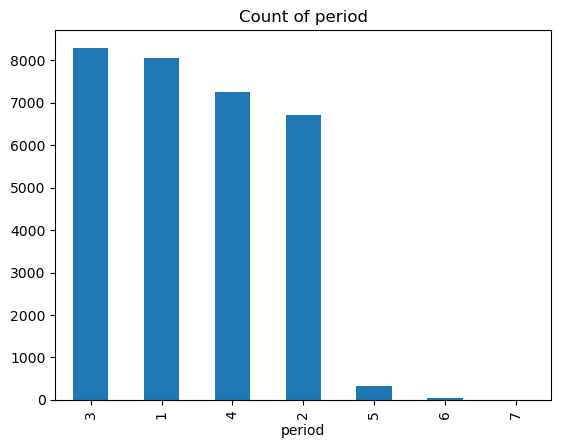

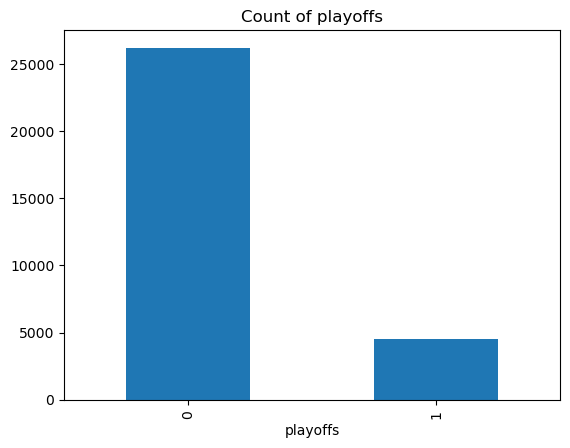

In [17]:
cat_cols = ['shot_type','shot_zone_basic','shot_zone_range','combined_shot_type','period','playoffs']

for col in cat_cols:
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Count of {col}")
    plt.show()


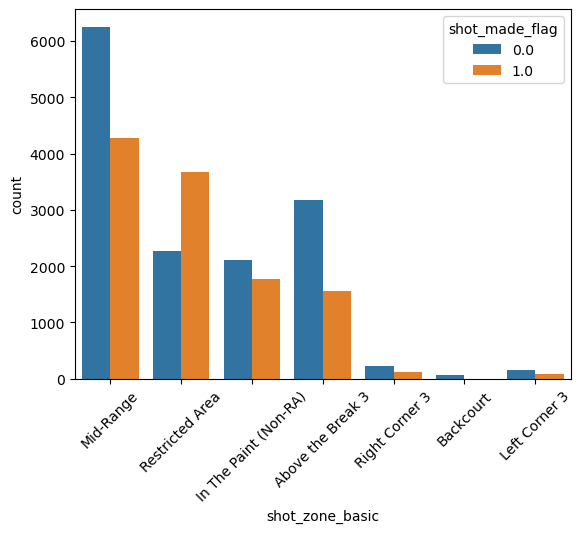

In [18]:
sns.countplot(x='shot_zone_basic', hue='shot_made_flag', data=data)
plt.xticks(rotation=45)
plt.show()


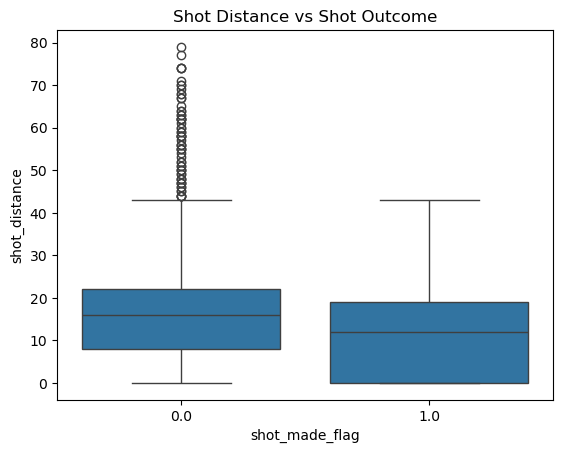

In [19]:
sns.boxplot(x='shot_made_flag', y='shot_distance', data=data)
plt.title("Shot Distance vs Shot Outcome")
plt.show()

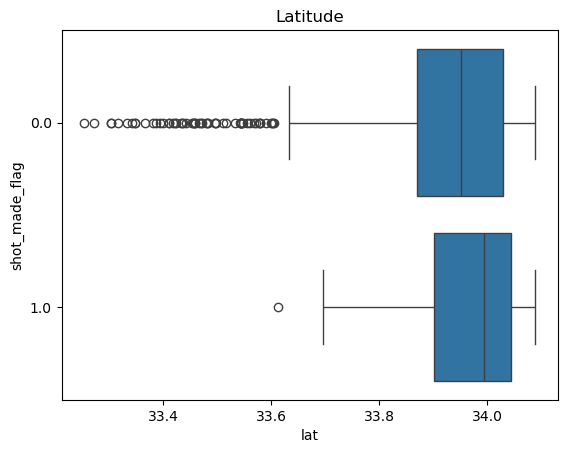

In [20]:
plot=sns.boxplot(x='lat', y='shot_made_flag', orient = "h", data=data)
plot.set(title="Latitude")
plt.show()

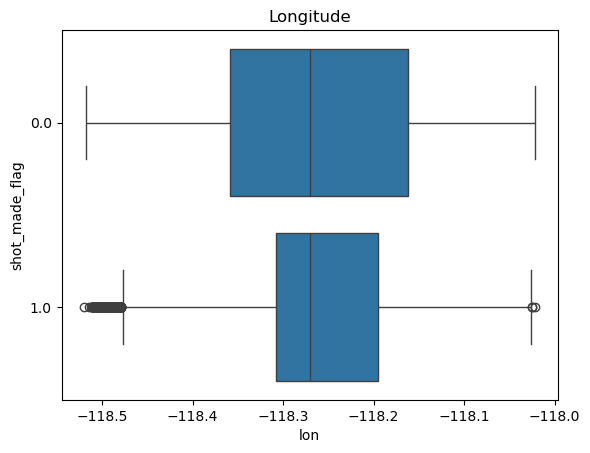

In [21]:
plot=sns.boxplot(x='lon', y='shot_made_flag', orient = "h", data=data)
plot.set(title="Longitude")
plt.show()

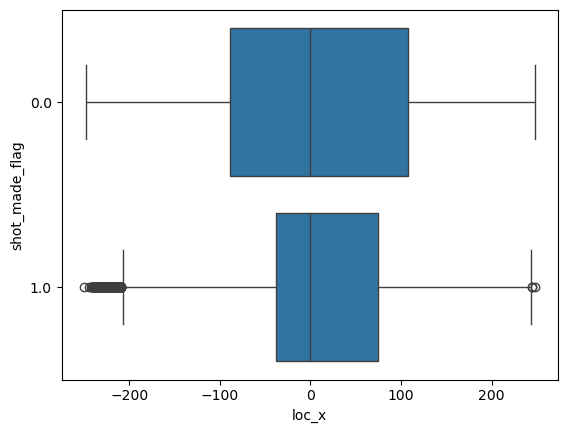

In [22]:
plot=sns.boxplot(x='loc_x', y='shot_made_flag', orient = "h", data=data)
plt.show()

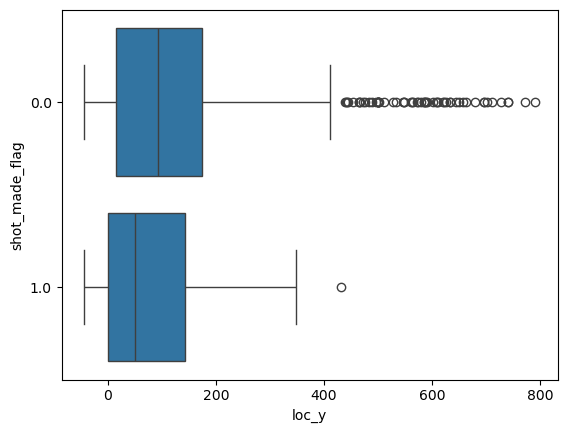

In [23]:
plot=sns.boxplot(x='loc_y', y='shot_made_flag', orient = "h", data=data)
plt.show()

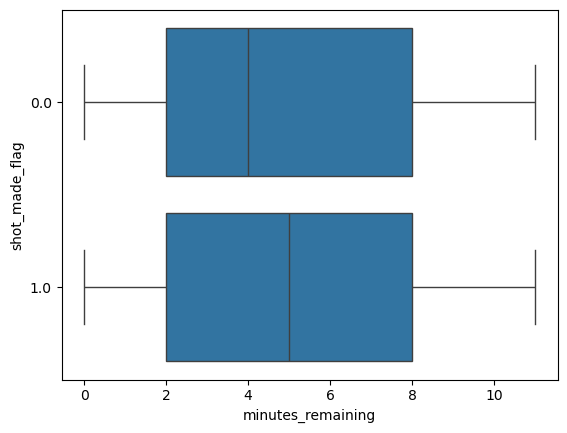

In [24]:
plot=sns.boxplot(x='minutes_remaining', y='shot_made_flag', orient = "h", data=data)
plt.show()

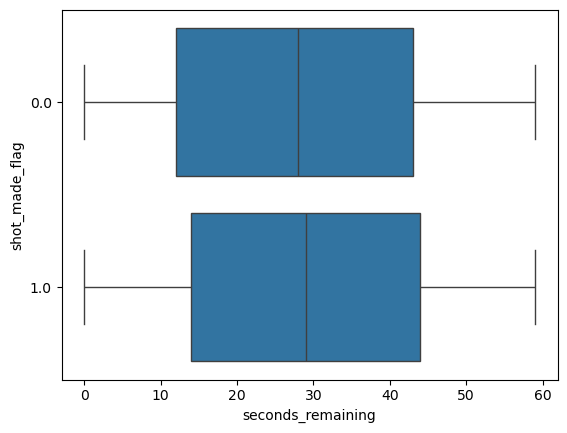

In [25]:
plot=sns.boxplot(x='seconds_remaining', y='shot_made_flag', orient = "h", data=data)
plt.show()

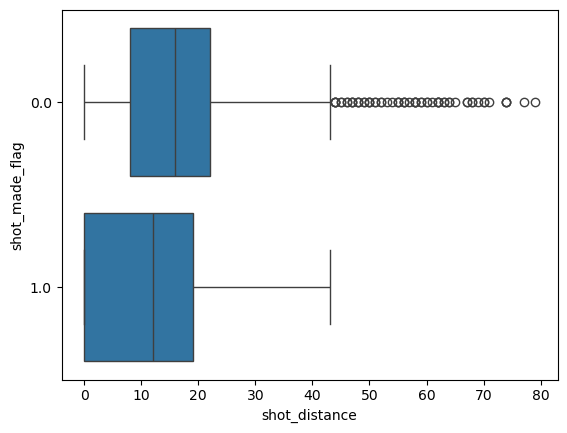

In [26]:
plot=sns.boxplot(x='shot_distance', y='shot_made_flag', orient = "h", data=data)
plt.show()

Data Preprocessing

Feature Selection

In [27]:
drop_cols = ['shot_id', 'team_id', 'team_name','game_id', 'game_event_id','lat', 'lon', 'game_date']
data = data.drop(columns=drop_cols, errors='ignore')

In [28]:
data = data.dropna(subset=['shot_made_flag'])

In [29]:
data = data.fillna(data.mode().iloc[0])

Encoding Categorical Variables

In [30]:
cat_cols = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

X = data.drop('shot_made_flag', axis=1)
y = data['shot_made_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42,)

In [32]:
X_train.shape

(19272, 206)

In [33]:
X_test.shape

(6425, 206)

In [34]:
y_train.shape

(19272,)

In [35]:
y_test.shape

(6425,)

In [36]:
X_train.head()

,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,action_type_Alley Oop Layup shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
5772,-176,-8,5,1,0,11,17,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15077,0,0,5,3,0,48,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28402,-84,84,7,2,1,34,11,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29397,0,0,9,4,1,12,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18256,73,164,6,1,0,57,17,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
X_test.head()

,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,action_type_Alley Oop Layup shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
24546,164,-1,8,3,0,11,16,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26431,-69,110,10,1,1,4,12,False,False,False,...,False,False,False,False,True,False,False,False,False,False
25051,147,106,11,2,0,29,18,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26209,0,0,7,3,1,39,0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
14336,0,0,1,4,0,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Model Building

Logistic Regression

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=3000)

In [58]:
y_pred_lr = lr.predict(X_test_scaled)

acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr  = f1_score(y_test, y_pred_lr)

Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred_rf = rf.predict(X_test)

In [43]:
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [45]:
results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [acc_rf],
    'F1 Score': [f1_rf]})
results

,Model,Accuracy,F1 Score
0,Random Forest,0.671751,0.564166


XGBoost

In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

xgb = XGBClassifier(objective='binary:logistic',eval_metric='logloss',random_state=42)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [67]:
y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb  = f1_score(y_test, y_pred_xgb)

print("Accuracy:", acc_xgb)
print("F1 Score:", f1_xgb)
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.6711284046692607
F1 Score: 0.564957792876261
              precision    recall  f1-score   support

         0.0       0.67      0.82      0.74      3597
         1.0       0.68      0.49      0.56      2828

    accuracy                           0.67      6425
   macro avg       0.67      0.65      0.65      6425
weighted avg       0.67      0.67      0.66      6425



GridsearchCV

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {'n_estimators': [100, 200],'max_depth': [3, 5],'learning_rate': [0.05, 0.1],'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0]}

xgb = XGBClassifier(objective='binary:logistic',eval_metric='logloss',random_state=42,n_jobs=-1)

grid_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,scoring='f1',cv=3,verbose=1,n_jobs=-1
                       )

grid_xgb.fit(X_train, y_train)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [49]:
grid_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1.0}

In [50]:
best_xgb = grid_xgb.best_estimator_

y_pred = best_xgb.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Best Params:", grid_xgb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.6831128404669261
F1 Score: 0.566069906223359
              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75      3597
         1.0       0.71      0.47      0.57      2828

    accuracy                           0.68      6425
   macro avg       0.69      0.66      0.66      6425
weighted avg       0.69      0.68      0.67      6425



KNN Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [52]:

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [59]:
y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn  = f1_score(y_test, y_pred_knn)

In [68]:
final_results = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','KNN','XGBoost (GridSearch)'],
    'Accuracy': [acc_lr, acc_rf, acc_knn, acc_xgb],
    'F1 Score': [f1_lr, f1_rf, f1_knn, f1_xgb]
})

final_results

,Model,Accuracy,F1 Score
0,Logistic Regression,0.682802,0.557918
1,Random Forest,0.671751,0.564166
2,KNN,0.615564,0.508751
3,XGBoost (GridSearch),0.671128,0.564958


Best model 

Best Model: XGBoost with GridSearch 
Reason: Highest F1-score, robustness to feature interactions, and better generalization.

Challenges Faced :

Distance-based models like KNN required careful feature scaling to ensure meaningful distance computation. Additionally, selecting an optimal number of neighbors was necessary to balance bias and variance. Tree-based models handled non-linear relationships more effectively, leading to better overall performance.